In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("rendimientosegundaversion_formateado.csv")

### Tiempo Medio por URL

In [2]:
urls = df.groupby("URL").sum()

print("MEDIA: " + str(urls.mean()["TIME"]) + " ms")
print("DESVIACION TIPICA: " + str(urls.std()["TIME"]) + " ms")

MEDIA: 7172.481356250116 ms
DESVIACION TIPICA: 7889.274592050425 ms


/tmp/ipykernel_548/2060920942.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  urls = df.groupby("URL").sum()


### Percentil 90

In [3]:
print("Percentil 90: " + str(urls.quantile(0.9)["TIME"]) + " ms")

Percentil 90: 14657.920199999999 ms


### Tiempo Medio por Vista

                  TIME
VISTA                 
articulo   5075.364959
categoria  2148.001259
grupo      1211.167822
                  TIME
VISTA                 
articulo   4091.013957
categoria  1818.830288
grupo      1083.482451


/tmp/ipykernel_548/561254234.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vista = vista.groupby(["URL", "VISTA"]).sum()


TypeError: 'module' object is not subscriptable

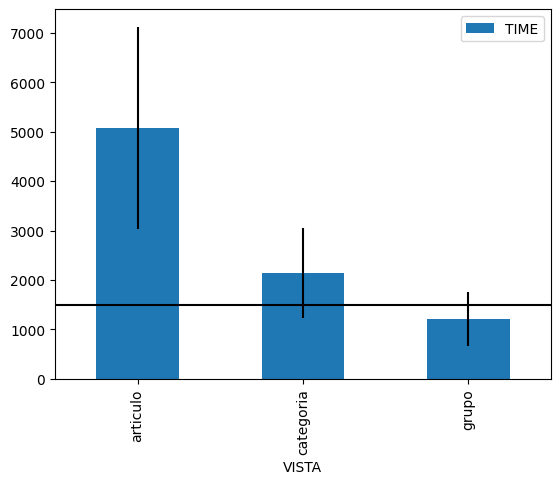

In [23]:
#vista = df.groupby(["URL", "VISTA"]).sum()

vista = df[df["SECCION"] != "Renderizado"]

vista = vista.groupby(["URL", "VISTA"]).sum()

print(vista.groupby("VISTA").mean())
print(vista.groupby("VISTA").std())

""" vista = vista.groupby("VISTA").mean() """

vista.groupby("VISTA").mean().plot(kind="bar", yerr = vista.groupby("VISTA").std() / 2)

plt.axhline(y=1500, color='black', linestyle='-')
plt.xlabel("Secciones")
plt.ylabel("Tiempo")
plt.legend(["Tiempo Objetivo", "Milisegundos"])

### Tiempo Medio por Secciones en Categorias

                                        TIME
SECCION                                     
Libra                             519.296563
Permisos                           69.891229
cacheoPreciosTime                 834.578830
carruselesGroupModeTime           617.681249
carruselesTime                    846.835811
contexTime                         54.486849
creacionResponseTime              242.320578
fechaCalculoNumeroArticulosTime    59.339219
ocultarFiltrosTime                469.974985
ordenadoItemsTime                  76.087953
ordenadoTime                       37.069713
renderizadoTime                   146.526221
seleccionArticulosCarruselesTime   32.877353
serializacionCarruselesTime        93.452528
updateCacheTime                   258.858929
                                         TIME
SECCION                                      
Libra                              481.314006
Permisos                            24.627586
cacheoPreciosTime                 1649.889715
carru

/tmp/ipykernel_548/2812516730.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1750], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/2812516730.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1750], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/2812516730.py:28: FutureWarning: The default value of numeric_only i

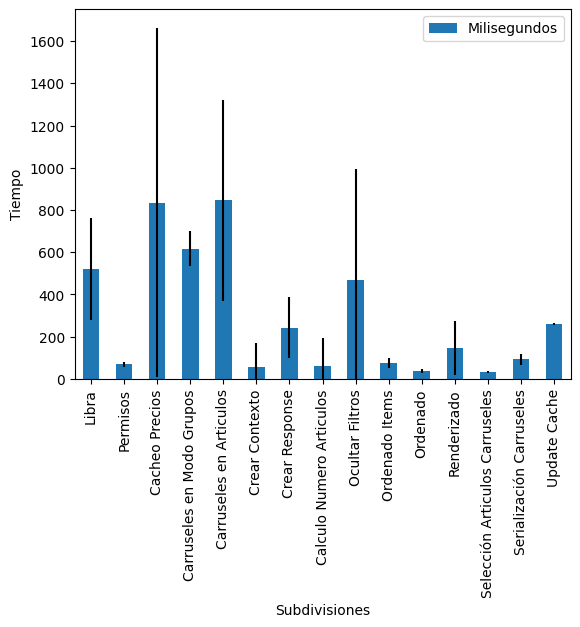

In [35]:
df = df.dropna()

categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["SECCION"] != "Renderizado") & (categoria["SECCION"] != "Datos") & (categoria["SECCION"] != "navCatTime") & (categoria["SECCION"] != "addCategoriaJsonTime") & (categoria["SECCION"] != "banerTime") & (categoria["SECCION"] != "filtradoGruposTime") & (categoria["SECCION"] != "filtradoTime") & (categoria["SECCION"] != "getObjectTime") & (categoria["SECCION"] != "metatagsTime")  & (categoria["SECCION"] != "navcatTime")  & (categoria["SECCION"] != "obtencionGruposTime")  & (categoria["SECCION"] != "paginacionAllItemsTime") & (categoria["SECCION"] != "paginacionGroupModeTime") & (categoria["SECCION"] != "paginacionTime") & (categoria["SECCION"] != "addCategoriaJsonTime")]

ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1750], xlabel="Subdivisiones", ylabel="Tiempo")

ax.set_xticklabels(["Libra", 
                    "Permisos", 
                    "Cacheo Precios", 
                    "Carruseles en Modo Grupos", 
                    "Carruseles en Articulos", 
                    "Crear Contexto", 
                    "Crear Response", 
                    "Calculo Numero Articulos",
                    "Ocultar Filtros",
                    "Ordenado Items",
                    "Ordenado",
                    "Renderizado",
                    "Selección Articulos Carruseles",
                    "Serialización Carruseles",
                    "Update Cache"
                    ])

ax.legend(["Milisegundos"])

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))


                                        TIME
SECCION                                     
Permisos                           69.891229
contexTime                         54.486849
creacionResponseTime              242.320578
fechaCalculoNumeroArticulosTime    59.339219
ordenadoItemsTime                  76.087953
ordenadoTime                       37.069713
renderizadoTime                   146.526221
seleccionArticulosCarruselesTime   32.877353
serializacionCarruselesTime        93.452528
updateCacheTime                   258.858929
                                        TIME
SECCION                                     
Permisos                           24.627586
contexTime                        234.603515
creacionResponseTime              289.260295
fechaCalculoNumeroArticulosTime   265.526805
ordenadoItemsTime                  44.513786
ordenadoTime                       20.022853
renderizadoTime                   252.947599
seleccionArticulosCarruselesTime    9.625242
serializac

/tmp/ipykernel_548/1331520593.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 450], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/1331520593.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 450], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/1331520593.py:24: FutureWarning: The default value of numeric_only in 

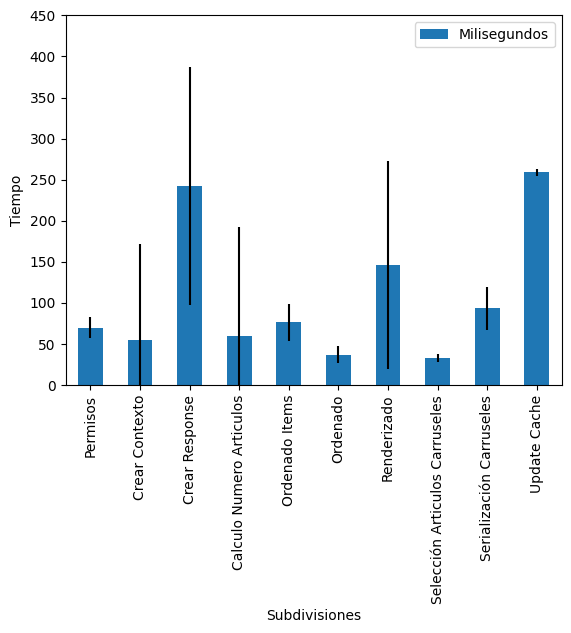

In [38]:
df = df.dropna()

categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["SECCION"] != "Renderizado") & (categoria["SECCION"] != "Datos") & (categoria["SECCION"] != "navCatTime") & (categoria["SECCION"] != "addCategoriaJsonTime") & (categoria["SECCION"] != "banerTime") & (categoria["SECCION"] != "filtradoGruposTime") & (categoria["SECCION"] != "filtradoTime") & (categoria["SECCION"] != "getObjectTime") & (categoria["SECCION"] != "metatagsTime")  & (categoria["SECCION"] != "navcatTime")  & (categoria["SECCION"] != "obtencionGruposTime")  & (categoria["SECCION"] != "paginacionAllItemsTime") & (categoria["SECCION"] != "paginacionGroupModeTime") & (categoria["SECCION"] != "paginacionTime") & (categoria["SECCION"] != "addCategoriaJsonTime") & (categoria["SECCION"] != "Libra") & (categoria["SECCION"] != "cacheoPreciosTime") & (categoria["SECCION"] != "carruselesGroupModeTime") & (categoria["SECCION"] != "carruselesTime") & (categoria["SECCION"] != "ocultarFiltrosTime")]

ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 450], xlabel="Subdivisiones", ylabel="Tiempo")

ax.set_xticklabels([ 
                    "Permisos",
                    "Crear Contexto", 
                    "Crear Response", 
                    "Calculo Numero Articulos",
                    "Ordenado Items",
                    "Ordenado",
                    "Renderizado",
                    "Selección Articulos Carruseles",
                    "Serialización Carruseles",
                    "Update Cache"
                    ])

ax.legend(["Milisegundos"])

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio por Secciones en Grupos

                             TIME
SECCION                          
Libra                  276.616576
Permisos                66.514768
cacheoPreciosTime      279.005639
consultaArbolTime       17.906571
generacionFiltrosTime  487.981263
migasPanTime            16.164615
ordenarItemsTime        55.856506
                             TIME
SECCION                          
Libra                  197.225334
Permisos                18.334662
cacheoPreciosTime      198.263686
consultaArbolTime        2.211161
generacionFiltrosTime  910.161444
migasPanTime             1.588909
ordenarItemsTime        25.461080


/tmp/ipykernel_548/848729956.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2, xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/848729956.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2, xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/848729956.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future 

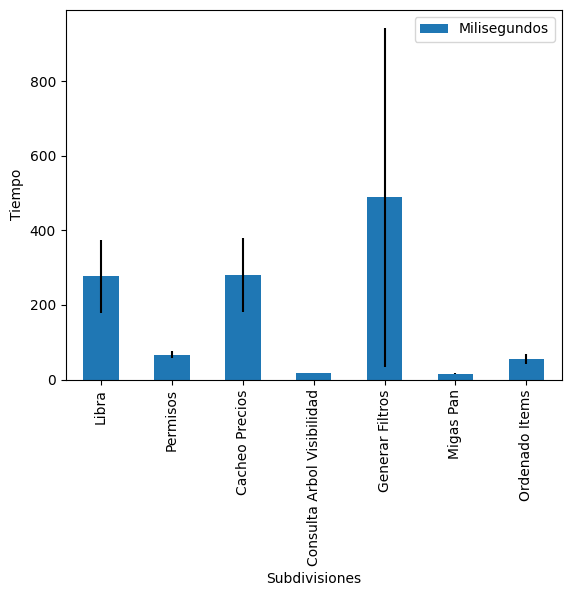

In [6]:
df = df.dropna()

grupo = df[df["VISTA"] == "grupo"]

grupo_filtrado = grupo[(grupo["SECCION"] != "Renderizado") & (grupo["SECCION"] != "Datos") & (grupo["SECCION"] != "paginacionItemsTime") & (grupo["SECCION"] != "filtradoArticulosTime") & (grupo["SECCION"] != "generarContextoTime") & (grupo["SECCION"] != "getObjectTime") & (grupo["SECCION"] != "mapeoArticulosTime") & (grupo["SECCION"] != "metatagTime") & (grupo["SECCION"] != "paginacionitemsTime")]

ax = grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2, xlabel="Subdivisiones", ylabel="Tiempo")

ax.set_xticklabels(["Libra", 
                    "Permisos", 
                    "Cacheo Precios", 
                    "Consulta Arbol Visibilidad",
                    "Generar Filtros",
                    "Migas Pan", 
                    "Ordenado Items",
                    ])

ax.legend(["Milisegundos"])

print(grupo_filtrado.groupby("SECCION").mean())
print(grupo_filtrado.groupby("SECCION").std(ddof=0))

                        TIME
SECCION                     
Permisos           66.514768
consultaArbolTime  17.906571
migasPanTime       16.164615
ordenarItemsTime   55.856506
                        TIME
SECCION                     
Permisos           18.334662
consultaArbolTime   2.211161
migasPanTime        1.588909
ordenarItemsTime   25.461080


/tmp/ipykernel_548/4059074238.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2, xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/4059074238.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2, xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/4059074238.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a futu

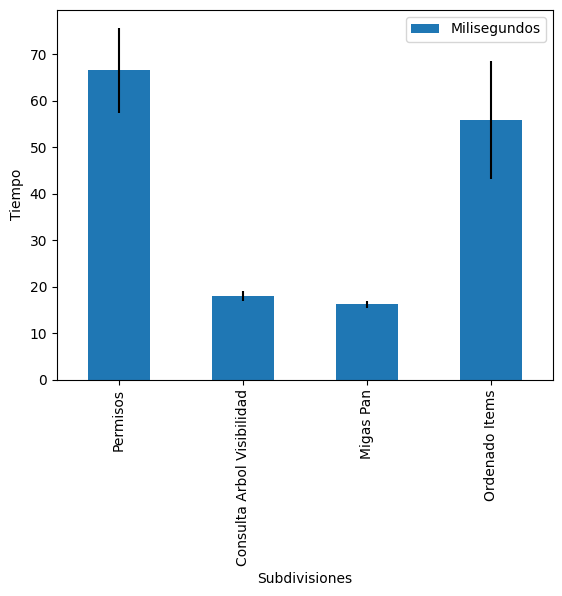

In [40]:
df = df.dropna()

grupo = df[df["VISTA"] == "grupo"]

grupo_filtrado = grupo[(grupo["SECCION"] != "Renderizado") & (grupo["SECCION"] != "Datos") & (grupo["SECCION"] != "paginacionItemsTime") & (grupo["SECCION"] != "filtradoArticulosTime") & (grupo["SECCION"] != "generarContextoTime") & (grupo["SECCION"] != "getObjectTime") & (grupo["SECCION"] != "mapeoArticulosTime") & (grupo["SECCION"] != "metatagTime") & (grupo["SECCION"] != "paginacionitemsTime") & (grupo["SECCION"] != "Libra") & (grupo["SECCION"] != "cacheoPreciosTime") & (grupo["SECCION"] != "generacionFiltrosTime")]

ax = grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std() / 2, xlabel="Subdivisiones", ylabel="Tiempo")

ax.set_xticklabels([
                    "Permisos",  
                    "Consulta Arbol Visibilidad",
                    "Migas Pan", 
                    "Ordenado Items",
                    ])

ax.legend(["Milisegundos"])

print(grupo_filtrado.groupby("SECCION").mean())
print(grupo_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio por Secciones en Articulos

/tmp/ipykernel_548/1947844458.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std() / 2, ylim=[0, 6000], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/1947844458.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std() / 2, ylim=[0, 6000], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_548/1947844458.py:31: FutureWarning: The default value of numeric_only in Da

                              TIME
SECCION                           
Datos                   235.618973
Libra                   899.643599
Permisos                 66.127688
articuloArbolTime        76.123356
atributosGrupoTime      142.195571
cachePrecioTime         153.418393
generarCarruselesTime  3489.521566
                              TIME
SECCION                           
Datos                    50.276212
Libra                   190.409851
Permisos                226.532876
articuloArbolTime        22.345795
atributosGrupoTime      265.051591
cachePrecioTime          44.948398
generarCarruselesTime  4049.045985


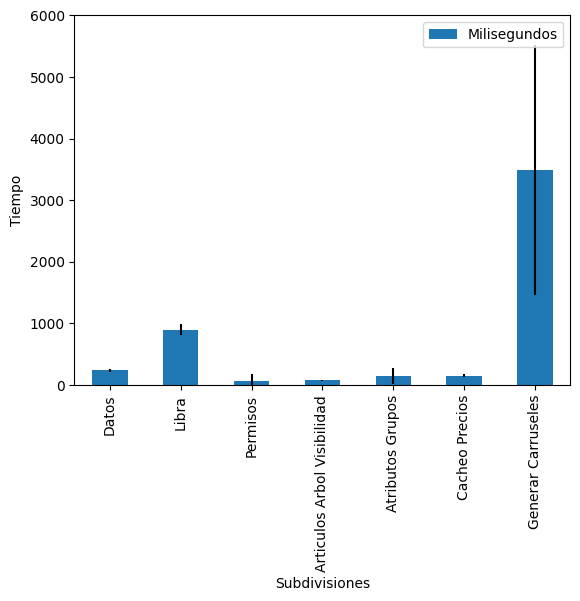

In [7]:
articulo = df[df["VISTA"] == "articulo"]

articulo_filtrado = articulo[(articulo["SECCION"] != "Renderizado") & (articulo["SECCION"] != "carruselesTime") & (articulo["SECCION"] != "contextoTime") & (articulo["SECCION"] != "getGrupoTime") & (articulo["SECCION"] != "mapaPreciosTime") & (articulo["SECCION"] != "metatagsTime")]

ax = articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std() / 2, ylim=[0, 6000], xlabel="Subdivisiones", ylabel="Tiempo")

""" ax.set_xticklabels(["Datos", 
                    "Libra",
                    "Permisos",
                    "Articulos Arbol Visibilidad",
                    "Atributos Grupos",
                    "Cacheo Precios",
                    "Crear Contexto",
                    "Generar Carruseles",
                    "Obtener Grupos",
                    "Mapa Precios",
                    "MetaTags",
                    ]) """

ax.set_xticklabels(["Datos", 
                    "Libra",
                    "Permisos",
                    "Articulos Arbol Visibilidad",
                    "Atributos Grupos",
                    "Cacheo Precios",
                    "Generar Carruseles",
                    ])

ax.legend(["Milisegundos"])

print(articulo_filtrado.groupby("SECCION").mean())
print(articulo_filtrado.groupby("SECCION").std(ddof=0))

In [ ]:
articulo = df[df["VISTA"] == "articulo"]

articulo_filtrado = articulo[(articulo["SECCION"] != "Renderizado") & (articulo["SECCION"] != "carruselesTime") & (articulo["SECCION"] != "contextoTime") & (articulo["SECCION"] != "getGrupoTime") & (articulo["SECCION"] != "mapaPreciosTime") & (articulo["SECCION"] != "metatagsTime")]

ax = articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std() / 2, ylim=[0, 6000], xlabel="Subdivisiones", ylabel="Tiempo")

""" ax.set_xticklabels(["Datos", 
                    "Libra",
                    "Permisos",
                    "Articulos Arbol Visibilidad",
                    "Atributos Grupos",
                    "Cacheo Precios",
                    "Crear Contexto",
                    "Generar Carruseles",
                    "Obtener Grupos",
                    "Mapa Precios",
                    "MetaTags",
                    ]) """

ax.set_xticklabels(["Datos", 
                    "Libra",
                    "Permisos",
                    "Articulos Arbol Visibilidad",
                    "Atributos Grupos",
                    "Cacheo Precios",
                    "Generar Carruseles",
                    ])

ax.legend(["Milisegundos"])

print(articulo_filtrado.groupby("SECCION").mean())
print(articulo_filtrado.groupby("SECCION").std(ddof=0))

### Tiempo Medio Libra

/tmp/ipykernel_548/1997132090.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  libra = df[df["SECCION"] == "Libra"].groupby("SECCION").mean()
/tmp/ipykernel_548/1997132090.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = libra.plot(kind="bar", yerr=df[df["SECCION"] == "Libra"].groupby("SECCION").std() / 2, ylabel="Tiempo", xlabel="")
/tmp/ipykernel_548/1997132090.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functi

               TIME
SECCION            
Libra    835.619728
               TIME
SECCION            
Libra    273.389462


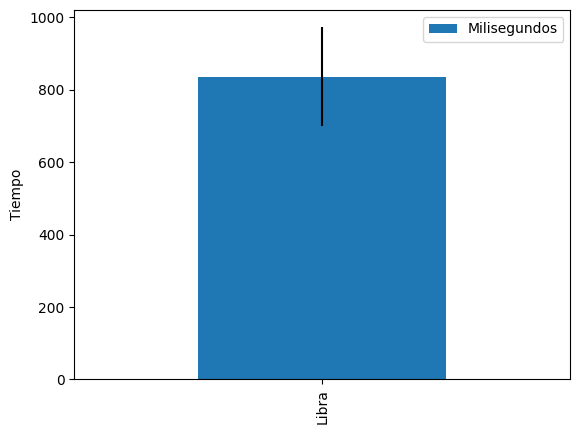

In [8]:
libra = df[df["SECCION"] == "Libra"].groupby("SECCION").mean()

ax = libra.plot(kind="bar", yerr=df[df["SECCION"] == "Libra"].groupby("SECCION").std() / 2, ylabel="Tiempo", xlabel="")

ax.legend(["Milisegundos"])

print(libra)
print(df[df["SECCION"] == "Libra"].groupby("SECCION").std())


In [9]:

categorias = df[df["VISTA"] == "categoria"]
grupos = df[df["VISTA"] == "grupo"]
articulos = df[df["VISTA"] == "articulo"]

categorias_filtradas = categorias.groupby("SECCION", as_index=False).mean()
grupos_filtrados = grupos.groupby("SECCION", as_index=False).mean()
articulos_filtrados = articulos.groupby("SECCION", as_index=False).mean()

print(categorias_filtradas)
print(grupos_filtrados)
print(articulos_filtrados)

                             SECCION         TIME
0                              Datos    11.626568
1                              Libra   519.296563
2                           Permisos    69.891229
3                        Renderizado  1027.419198
4               addCategoriaJsonTime     0.773610
5                          banerTime     0.077502
6                  cacheoPreciosTime   834.578830
7            carruselesGroupModeTime   617.681249
8                     carruselesTime   846.835811
9                         contexTime    54.486849
10              creacionResponseTime   242.320578
11   fechaCalculoNumeroArticulosTime    59.339219
12                filtradoGruposTime     0.878685
13                      filtradoTime     1.849570
14                     getObjectTime     4.533699
15                      metatagsTime     0.048640
16                        navCatTime     0.183224
17                        navcatTime     7.031240
18               obtencionGruposTime     4.075605


/tmp/ipykernel_548/2658029963.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categorias_filtradas = categorias.groupby("SECCION", as_index=False).mean()
/tmp/ipykernel_548/2658029963.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupos_filtrados = grupos.groupby("SECCION", as_index=False).mean()
/tmp/ipykernel_548/2658029963.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  articulos_filtrados = articulos

In [13]:

libra_categorias = int(categorias_filtradas[categorias_filtradas["SECCION"] == "Libra"]["TIME"] * 2)
libra_articulos = int(articulos_filtrados[articulos_filtrados["SECCION"] == "Libra"]["TIME"])
libra_grupos = int(grupos_filtrados[grupos_filtrados["SECCION"] == "Libra"]["TIME"])


torvigo_categorias = df[df["VISTA"] == "categoria"]
torvigo_categorias = torvigo_categorias[(torvigo_categorias["SECCION"] != "Libra") & (torvigo_categorias["SECCION"] != "Renderizado")]
torvigo_categorias = torvigo_categorias.groupby(["URL", "VISTA"]).sum() * 2
torvigo_categorias = int(torvigo_categorias.groupby("VISTA").mean()["TIME"])


torvigo_grupos = df[df["VISTA"] == "grupo"]
torvigo_grupos = torvigo_grupos[(torvigo_grupos["SECCION"] != "Libra") & (torvigo_grupos["SECCION"] != "Renderizado")]
torvigo_grupos = torvigo_grupos.groupby(["URL", "VISTA"]).sum()
torvigo_grupos = int(torvigo_grupos.groupby("VISTA").mean()["TIME"])


torvigo_articulos = df[df["VISTA"] == "articulo"]
torvigo_articulos = torvigo_articulos[(torvigo_articulos["SECCION"] != "Libra") & (torvigo_articulos["SECCION"] != "Renderizado")]
torvigo_articulos = torvigo_articulos.groupby(["URL", "VISTA"]).sum()
torvigo_articulos = int(torvigo_articulos.groupby("VISTA").mean()["TIME"])

print(libra_categorias)
print(libra_grupos)
print(libra_articulos)

print(torvigo_categorias)
print(torvigo_grupos)
print(torvigo_articulos)


/tmp/ipykernel_548/3000242108.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  torvigo_categorias = torvigo_categorias.groupby(["URL", "VISTA"]).sum() * 2
/tmp/ipykernel_548/3000242108.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  torvigo_grupos = torvigo_grupos.groupby(["URL", "VISTA"]).sum()


1038
276
899
3257
934
4175


/tmp/ipykernel_548/3000242108.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  torvigo_articulos = torvigo_articulos.groupby(["URL", "VISTA"]).sum()


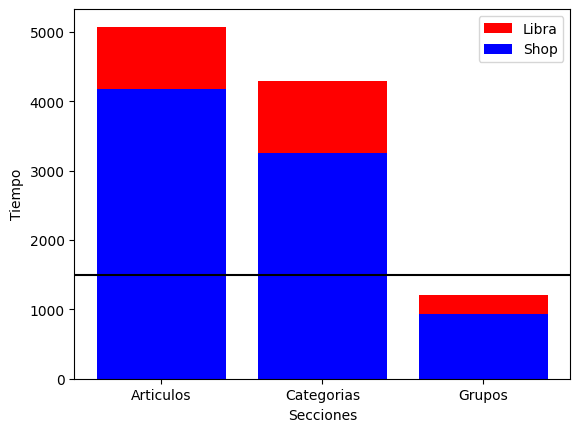

In [26]:

data = pd.DataFrame({
                        "Torvigo" : [torvigo_articulos, torvigo_categorias, torvigo_grupos],
                        "Libra" : [libra_articulos, libra_categorias, libra_grupos],
                    },
                    index=('Articulos', "Categorias", "Grupos",))


plt.bar(data.index, data.Torvigo + data.Libra, label='Libra', color="red")

plt.bar(data.index, data.Torvigo, label='Shop', color="blue")

plt.ylabel("Tiempo")

plt.xlabel("Secciones")

plt.legend(loc='best')

plt.axhline(y=1500, color='black', linestyle='-')

plt.show()

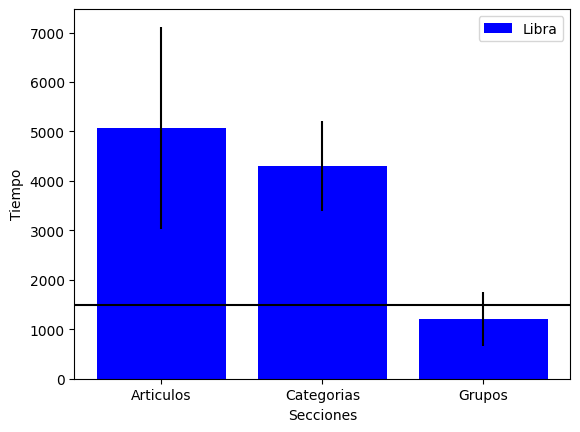

In [33]:
data = pd.DataFrame({
                        "Torvigo" : [torvigo_articulos, torvigo_categorias, torvigo_grupos],
                        "Libra" : [libra_articulos, libra_categorias, libra_grupos],
                    },
                    index=('Articulos', "Categorias", "Grupos",))


plt.bar(data.index, data.Torvigo + data.Libra, label='Libra', color="blue", yerr=[2045,909,541])

plt.ylabel("Tiempo")

plt.xlabel("Secciones")

plt.legend(loc='best')

plt.axhline(y=1500, color='black', linestyle='-')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


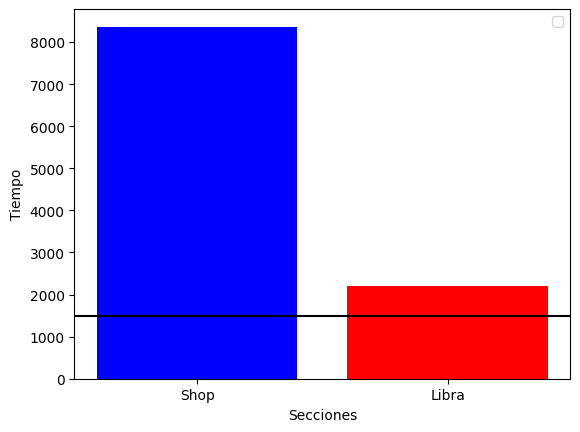

In [21]:
data = pd.DataFrame({
                        "Torvigo" : [torvigo_articulos + torvigo_categorias + torvigo_grupos, libra_articulos + libra_categorias + libra_grupos],
                    },
                    index=('Shop', "Libra"))


#plt.bar(data.index, data.Torvigo, color="blue")

plt.bar(data.index, data.Torvigo, color=["blue", "red"])

plt.ylabel("Tiempo")

plt.xlabel("Secciones")

plt.legend(loc='best')

plt.axhline(y=1500, color='black', linestyle='-')

plt.show()

In [9]:
categorias_group_mode = df[(df["URL"].str.contains("group_mode=true")) & df["SECCION"] != "Renderizado"]
categorias_art_mode = df[(df["URL"].str.contains(r"!group_mode=true", regex=True))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categorias_group_mode = categorias_group_mode.groupby(["URL", "VISTA"]).sum()

print(categorias_group_mode.groupby("VISTA").mean())

                  TIME
VISTA                 
articulo   7814.186707
categoria  3175.619878
grupo      1793.310754


/tmp/ipykernel_619/746493858.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categorias_group_mode = categorias_group_mode.groupby(["URL", "VISTA"]).sum()


/tmp/ipykernel_367/1894869635.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1400])
/tmp/ipykernel_367/1894869635.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1400])
/tmp/ipykernel_367/1894869635.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fal

                                       TIME
SECCION                                    
Libra                            432.620477
Permisos                          69.925217
addCategoriaJsonTime               0.777634
banerTime                          0.077636
carruselesGroupModeTime          581.962037
carruselesTime                   845.110568
contexTime                        54.307057
creacionResponseTime             181.899313
fechaCalculoNumeroArticulosTime    0.012472
filtradoGruposTime                 0.659392
filtradoTime                       1.880720
getObjectTime                      4.529628
metatagsTime                       0.048322
navCatTime                         0.183275
navcatTime                         6.980427
obtencionGruposTime                3.028351
ocultarFiltrosTime               364.891365
ordenadoItemsTime                 72.417451
ordenadoTime                      36.967280
paginacionGroupModeTime            0.517317
renderizadoTime                 

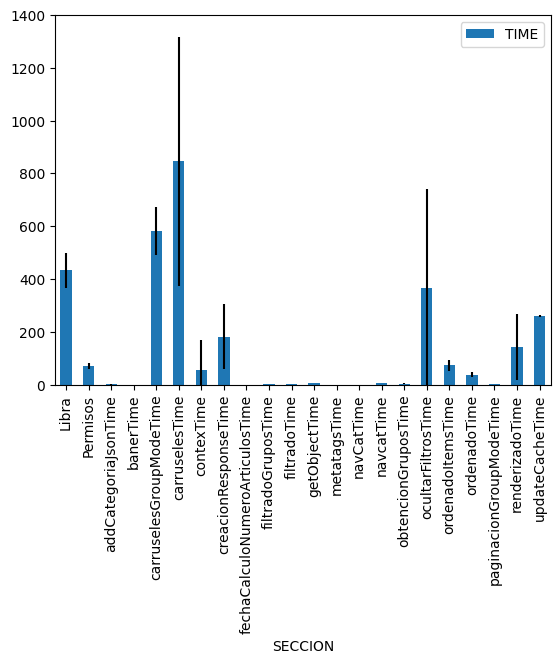

In [22]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[(~(df["URL"].str.contains(r"group_mode=true", regex=True)) & (df["VISTA"] == "categoria"))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categoria_filtrado = categorias_group_mode[(categorias_group_mode["SECCION"] != "Renderizado") & (categorias_group_mode["SECCION"] != "Datos")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1400])

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))

In [10]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[(~(df["URL"].str.contains(r"group_mode=true", regex=True))) & df["SECCION"] != "Renderizado"]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categorias_art_mode = categorias_art_mode.groupby(["URL", "VISTA"]).sum()

print(categorias_art_mode.groupby("VISTA").mean())

                  TIME
VISTA                 
articulo   7814.186707
categoria  3175.619878
grupo      1793.310754


/tmp/ipykernel_619/462954388.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categorias_art_mode = categorias_art_mode.groupby(["URL", "VISTA"]).sum()


/tmp/ipykernel_367/3060934819.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1700])
/tmp/ipykernel_367/3060934819.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1700])
/tmp/ipykernel_367/3060934819.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fal

                                        TIME
SECCION                                     
Libra                             605.939015
Permisos                           69.857254
addCategoriaJsonTime                0.769599
banerTime                           0.077367
cacheoPreciosTime                 834.578830
carruselesGroupModeTime           689.914140
carruselesTime                    848.555378
contexTime                         54.666570
creacionResponseTime              302.741842
fechaCalculoNumeroArticulosTime   118.470813
filtradoGruposTime                  1.322149
filtradoTime                        1.818420
getObjectTime                       4.537768
metatagsTime                        0.048958
navCatTime                          0.183173
navcatTime                          7.082034
obtencionGruposTime                 5.122860
ocultarFiltrosTime                575.058604
ordenadoItemsTime                  83.510597
ordenadoTime                       37.172146
paginacion

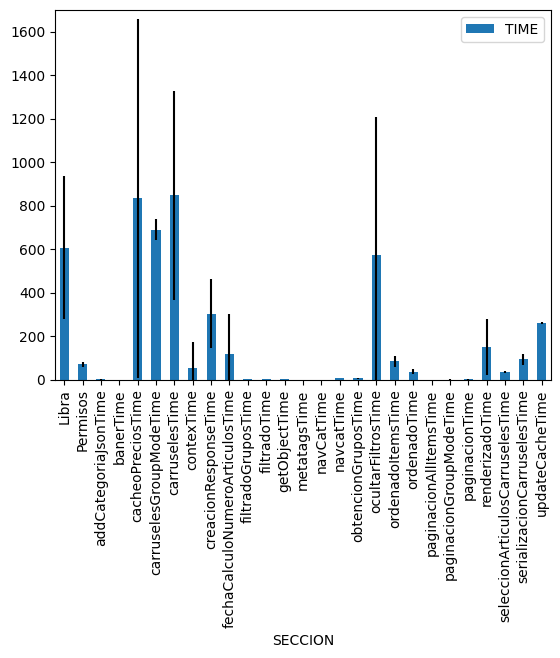

In [23]:
categorias_group_mode = df[df["URL"].str.contains("group_mode=true")]
categorias_art_mode = df[(~(df["URL"].str.contains(r"group_mode=true", regex=True)) & (df["VISTA"] == "categoria"))]

#categorias_art_mode = categorias_art_mode[categorias_art_mode["VISTA"] == "categoria"]

categoria_filtrado = categorias_art_mode[(categorias_art_mode["SECCION"] != "Renderizado") & (categorias_art_mode["SECCION"] != "Datos")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1700])

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std(ddof=0))

/tmp/ipykernel_619/3354145530.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1750], xlabel="Subdivisiones", ylabel="Tiempo")
/tmp/ipykernel_619/3354145530.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1750], xlabel="Subdivisiones", ylabel="Tiempo")


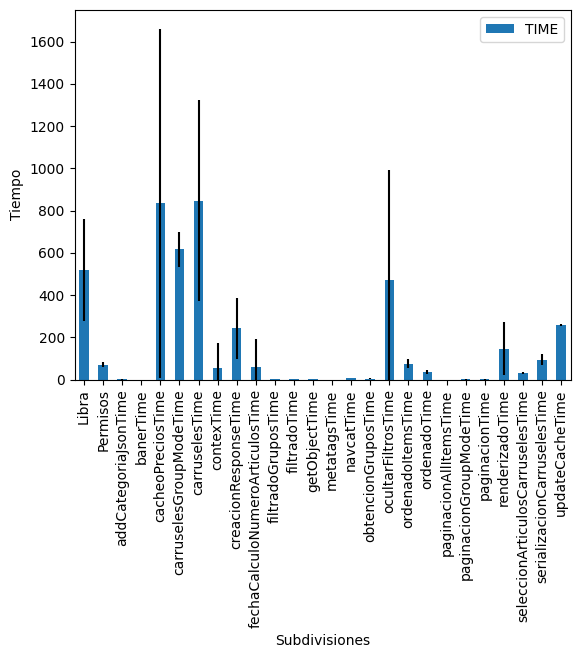

In [29]:
df = df.dropna()

categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["SECCION"] != "Renderizado") & (categoria["SECCION"] != "Datos") & (categoria["SECCION"] != "navCatTime") & (categoria["SECCION"] != "addCategoriaJsonTime") & (categoria["SECCION"] != "navCatTime")]

ax = categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std() / 2, ylim=[0, 1750], xlabel="Subdivisiones", ylabel="Tiempo")